Chapter 19
# Pandas常见运算
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris_df = sns.load_dataset("iris")
# 从Seaborn中导入鸢尾花数据帧

## 加减乘除

C:\Users\james\AppData\Local\Temp\ipykernel_12332\2962866553.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df_['X1_centered'] = X_df_['X1'] - X_df_['X1'].mean()


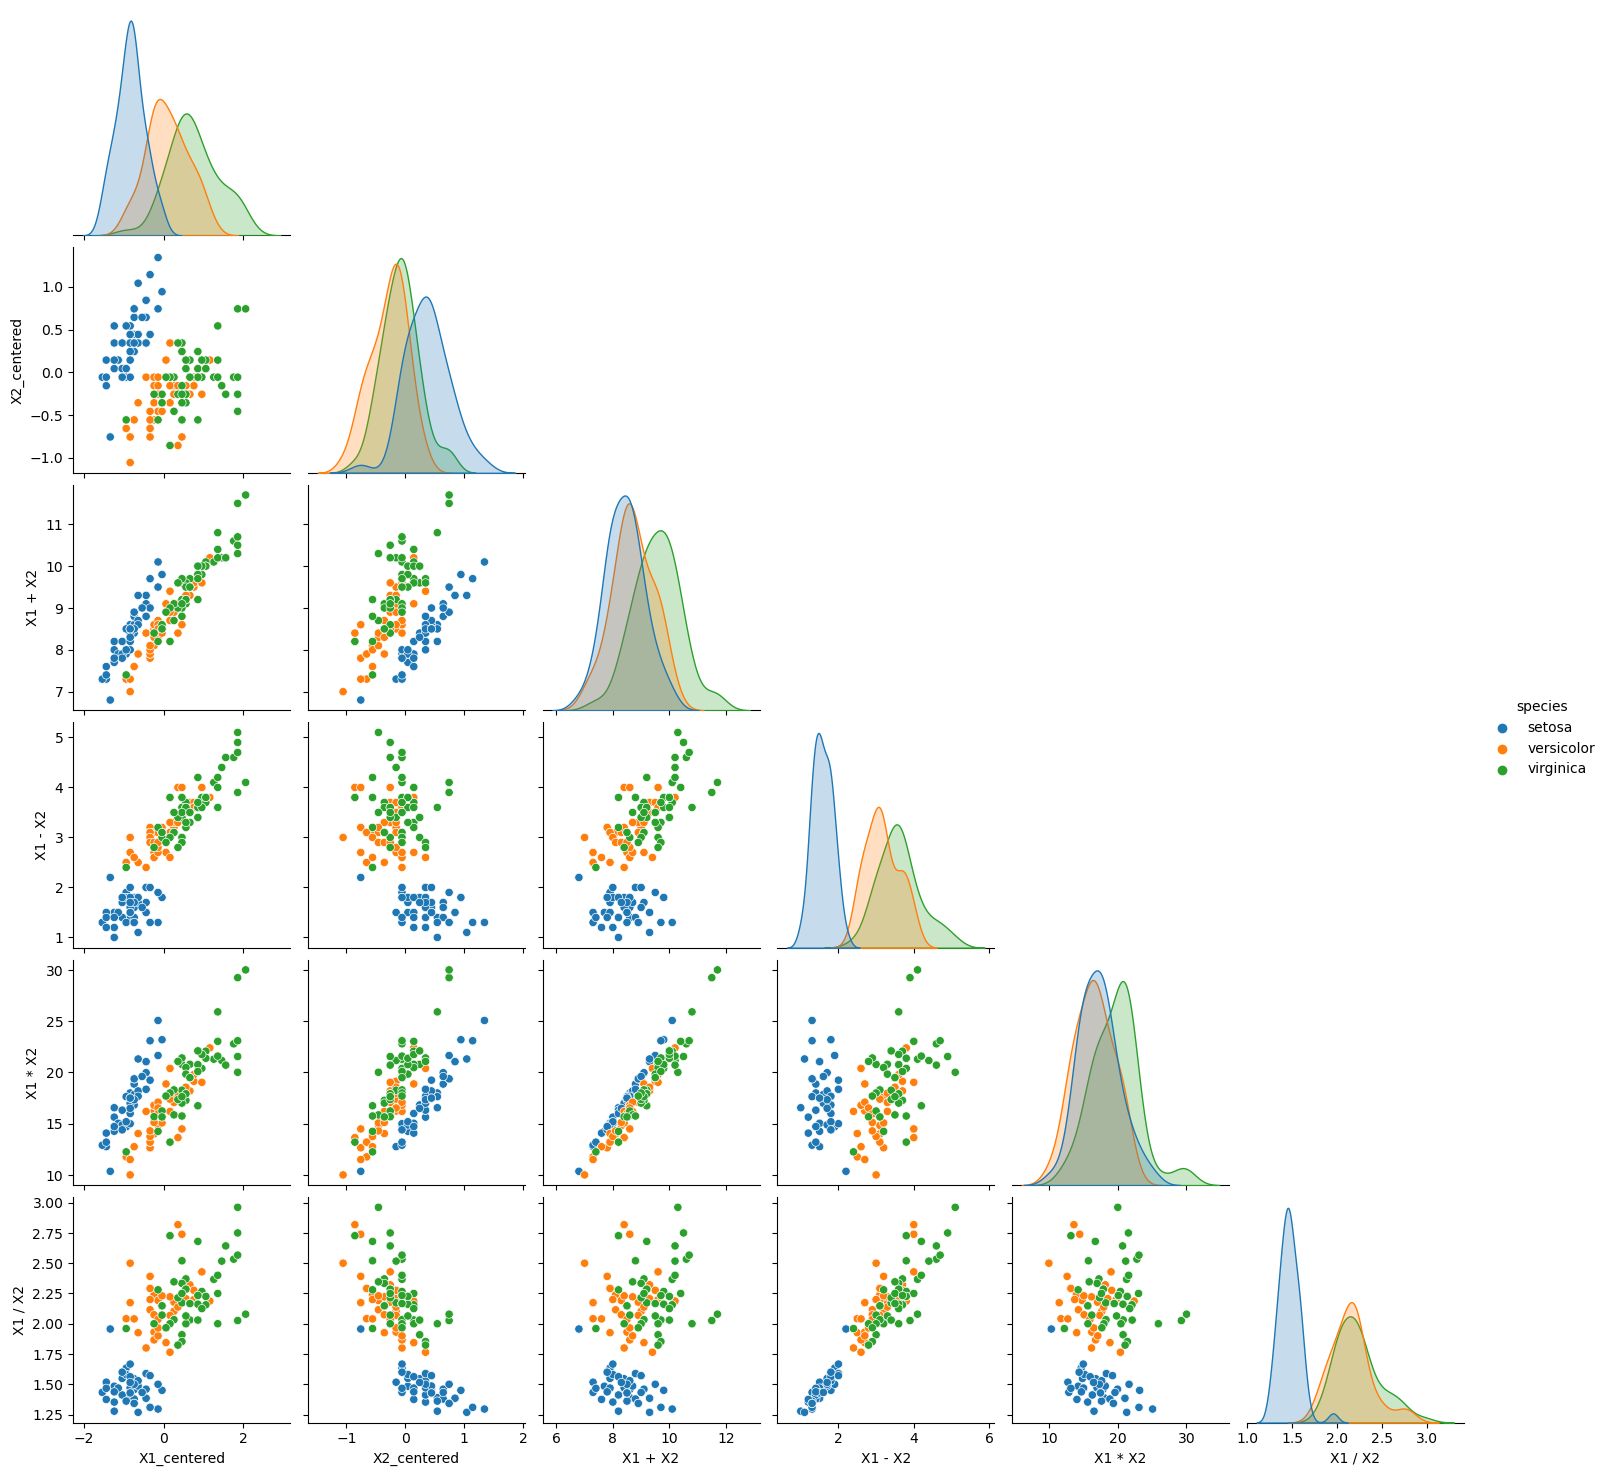

In [3]:
# Load the iris data
X_df = iris_df.copy()

X_df.rename(columns = {'sepal_length':'X1', 
                       'sepal_width':'X2'}, 
            inplace = True)

X_df_ = X_df[['X1','X2', 'species']]

#%% data transformation

X_df_['X1 - E(X1)'] = X_df_['X1'] - X_df_['X1'].mean()
X_df_['X2 - E(X2)'] = X_df_['X2'] - X_df_['X2'].mean()
X_df_['X1 + X2'] = X_df_['X1'] + X_df_['X2'] 
X_df_['X1 - X2'] = X_df_['X1'] - X_df_['X2'] 
X_df_['X1 * X2'] = X_df_['X1'] * X_df_['X2'] 
X_df_['X1 / X2'] = X_df_['X1'] / X_df_['X2'] 
X_df_.drop(['X1','X2'], axis=1, inplace=True)

# 可视化

sns.pairplot(X_df_, corner=True, hue="species")

## 统计汇总

In [4]:
# 数据帧统计汇总
# 注意很多统计运算只针对数值，比如自动忽略'species'一列
iris_df.describe()
# 参考：
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 对于特定列的汇总
iris_df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [6]:
# 等价于
iris_df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

### 最大、最小值

In [7]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [8]:
iris_df.min()

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

### 均值、中位数、众数

In [9]:
# 均值
iris_df.mean()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\2873841849.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [10]:
# 中位数
iris_df.median()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\210965164.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.median()


sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [11]:
# 众数
iris_df.mode(numeric_only = True, dropna=True)
# ???

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


### 独特值

In [12]:
# 鸢尾花种类 'species' 一列独特值
iris_df['species'].unique()
# 常用来获得标签

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
# 将数组转化为列
iris_df['species'].unique().tolist()

['setosa', 'versicolor', 'virginica']

In [14]:
# 鸢尾花种类 'species' 独特值数量
iris_df['species'].nunique()
# 常用来获得标签数量

3

### 排序

In [15]:
# 根据花萼长度排序，默认从小到大
iris_df.sort_values(['sepal_length'])

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


### 分位

In [16]:
iris_df.quantile([0.05, 0.95])

C:\Users\james\AppData\Local\Temp\ipykernel_12332\834856868.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.quantile([0.05, 0.95])


,sepal_length,sepal_width,petal_length,petal_width
0.05,4.600,2.345,1.3,0.2
0.95,7.255,3.800,6.1,2.3


In [17]:
# 根据花萼长度排序，默认从大到小
iris_df.sort_values(['sepal_length'], ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


### 样本方差
注意，分母 n - 1

In [18]:
iris_df.var()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\2829397562.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.var()


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

### 样本标准差
注意，分母 n - 1

In [19]:
iris_df.std()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\18420640.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.std()


sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

### 协方差矩阵
注意，默认分母n - 1

In [20]:
iris_df.cov()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\3314449492.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.cov()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


### 相关性系数矩阵
三种类型{‘pearson’, ‘kendall’, ‘spearman’}，默认pearson

In [21]:
iris_df.corr()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\1934569051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [22]:
iris_df.skew()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\276201852.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.skew()


sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [23]:
iris_df.kurt()
# 也可以用 iris_df.kurtosis()

C:\Users\james\AppData\Local\Temp\ipykernel_12332\3298255430.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.kurt()


sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [24]:
### 频率

In [25]:

iris_df_rounded = np.ceil(iris_df[iris_df.columns[:4]])
# 向上取整
iris_df_rounded

,sepal_length,sepal_width,petal_length,petal_width
0,6.0,4.0,2.0,1.0
1,5.0,3.0,2.0,1.0
2,5.0,4.0,2.0,1.0
3,5.0,4.0,2.0,1.0
4,5.0,4.0,2.0,1.0
...,...,...,...,...
145,7.0,3.0,6.0,3.0
146,7.0,3.0,5.0,2.0
147,7.0,3.0,6.0,2.0
148,7.0,4.0,6.0,3.0


In [26]:
iris_df_rounded.sepal_length.unique()

array([6., 5., 7., 8.])

In [27]:
iris_df_rounded.sepal_width.unique()

array([4., 3., 5., 2.])

In [28]:
iris_df_rounded.value_counts()

sepal_length  sepal_width  petal_length  petal_width
5.0           4.0          2.0           1.0            19
6.0           4.0          2.0           1.0            19
7.0           3.0          5.0           2.0            17
6.0           3.0          5.0           2.0            15
7.0           4.0          6.0           3.0            11
6.0           3.0          4.0           2.0             8
5.0           3.0          2.0           1.0             8
7.0           3.0          6.0           2.0             7
              4.0          5.0           2.0             6
              3.0          6.0           3.0             5
6.0           3.0          6.0           2.0             4
              5.0          2.0           1.0             3
8.0           3.0          7.0           3.0             3
                                         2.0             3
6.0           3.0          4.0           1.0             3
7.0           4.0          6.0           2.0             2
8.0

In [29]:
iris_df_rounded[['sepal_length','sepal_width']].value_counts()

sepal_length  sepal_width
6.0           3.0            33
7.0           3.0            30
6.0           4.0            21
5.0           4.0            20
7.0           4.0            19
5.0           3.0            11
8.0           3.0             8
              4.0             4
6.0           5.0             3
5.0           2.0             1
dtype: int64

In [30]:
iris_sepal = iris_df_rounded[['sepal_length','sepal_width']]
iris_sepal['count'] = 1

C:\Users\james\AppData\Local\Temp\ipykernel_12332\3023332425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_sepal['count'] = 1


In [31]:
frequency_matrix =iris_sepal.groupby(['sepal_length','sepal_width']).count().unstack(level=0)
frequency_matrix

count                 
sepal_length   5.0   6.0   7.0  8.0
sepal_width                        
2.0            1.0   NaN   NaN  NaN
3.0           11.0  33.0  30.0  8.0
4.0           20.0  21.0  19.0  4.0
5.0            NaN   3.0   NaN  NaN

In [32]:
### 将连续转为分类

In [33]:
pd.cut(iris_df.sepal_length, bins = 3, labels = ['short', 'medium', 'long'])

0       short
1       short
2       short
3       short
4       short
        ...  
145    medium
146    medium
147    medium
148    medium
149    medium
Name: sepal_length, Length: 150, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

## groupby

In [35]:
iris_df = sns.load_dataset("iris")
iris_df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [36]:
iris_df.groupby(['species']).std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [37]:
iris_df.groupby(['species']).var()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [38]:
three_cov_matrics = iris_df.groupby(['species']).cov()
three_cov_matrics

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      0.124249     0.099216      0.016355     0.010331
           sepal_width       0.099216     0.143690      0.011698     0.009298
           petal_length      0.016355     0.011698      0.030159     0.006069
           petal_width       0.010331     0.009298      0.006069     0.011106
versicolor sepal_length      0.266433     0.085184      0.182898     0.055780
           sepal_width       0.085184     0.098469      0.082653     0.041204
           petal_length      0.182898     0.082653      0.220816     0.073102
           petal_width       0.055780     0.041204      0.073102     0.039106
virginica  sepal_length      0.404343     0.093763      0.303290     0.049094
           sepal_width       0.093763     0.104004      0.071380     0.047629
           petal_length      0.303290     0.071380      0.304588     0.048824
           petal_width       0.049094     0.047629      0.048824     0.075433

In [59]:
three_cov_matrics.index

MultiIndex([(    'setosa', 'sepal_length'),
            (    'setosa',  'sepal_width'),
            (    'setosa', 'petal_length'),
            (    'setosa',  'petal_width'),
            ('versicolor', 'sepal_length'),
            ('versicolor',  'sepal_width'),
            ('versicolor', 'petal_length'),
            ('versicolor',  'petal_width'),
            ( 'virginica', 'sepal_length'),
            ( 'virginica',  'sepal_width'),
            ( 'virginica', 'petal_length'),
            ( 'virginica',  'petal_width')],
           names=['species', None])

In [77]:
three_cov_matrics.columns.get_level_values(0)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [58]:
three_cov_matrics.index.get_level_values(0).unique().to_list()

['setosa', 'versicolor', 'virginica']

In [61]:
three_cov_matrics.index.get_level_values('species').unique().to_list()

['setosa', 'versicolor', 'virginica']

In [60]:
three_cov_matrics.index.get_level_values(1).unique().to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [48]:
three_cov_matrics.loc['setosa']
# 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.124249,0.099216,0.016355,0.010331
sepal_width,0.099216,0.143690,0.011698,0.009298
petal_length,0.016355,0.011698,0.030159,0.006069
petal_width,0.010331,0.009298,0.006069,0.011106


In [40]:
three_cov_matrics.xs('setosa')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.124249,0.099216,0.016355,0.010331
sepal_width,0.099216,0.143690,0.011698,0.009298
petal_length,0.016355,0.011698,0.030159,0.006069
petal_width,0.010331,0.009298,0.006069,0.011106


In [41]:
iris_df.loc[iris_df['species'] == 'setosa'].cov()
# 介绍条件

C:\Users\james\AppData\Local\Temp\ipykernel_12332\2721001069.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.loc[iris_df['species'] == 'setosa'].cov()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.124249,0.099216,0.016355,0.010331
sepal_width,0.099216,0.143690,0.011698,0.009298
petal_length,0.016355,0.011698,0.030159,0.006069
petal_width,0.010331,0.009298,0.006069,0.011106


## agg

In [3]:
iris_df.iloc[:,0:4].agg(['sum', 'min', 'max', 'std', 'var', 'mean', np.mean])

,sepal_length,sepal_width,petal_length,petal_width
sum,876.500000,458.600000,563.700000,179.900000
min,4.300000,2.000000,1.000000,0.100000
max,7.900000,4.400000,6.900000,2.500000
std,0.828066,0.435866,1.765298,0.762238
var,0.685694,0.189979,3.116278,0.581006
mean,5.843333,3.057333,3.758000,1.199333
mean,5.843333,3.057333,3.758000,1.199333


In [84]:
iris_df.iloc[:,0:3].agg(['sum', 'min', 'max', 'std', 'var', 'mean'], axis = 'columns')

,sum,min,max,std,var,mean
0,10.0,1.4,5.1,1.855622,3.443333,3.333333
1,9.3,1.4,4.9,1.752142,3.070000,3.100000
2,9.2,1.3,4.7,1.703917,2.903333,3.066667
3,9.2,1.5,4.6,1.550269,2.403333,3.066667
4,10.0,1.4,5.0,1.814754,3.293333,3.333333
...,...,...,...,...,...,...
145,14.9,3.0,6.7,1.861003,3.463333,4.966667
146,13.8,2.5,6.3,1.931321,3.730000,4.600000
147,14.7,3.0,6.5,1.769181,3.130000,4.900000
148,15.0,3.4,6.2,1.442221,2.080000,5.000000


## map

In [69]:
import pandas as pd
import seaborn as sns

# 加载鸢尾花数据集
iris = sns.load_dataset('iris')


In [70]:
# 定义映射函数
def map_sepal_length(sepal_length):
    if sepal_length < 5:
        return "短"
    elif 5 <= sepal_length < 6:
        return "中等"
    else:
        return "长"

# 使用 map 方法将花萼长度映射为分类值
iris['sepal_length_category'] = iris['sepal_length'].map(map_sepal_length)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_category
0,5.1,3.5,1.4,0.2,setosa,中等
1,4.9,3.0,1.4,0.2,setosa,短
2,4.7,3.2,1.3,0.2,setosa,短
3,4.6,3.1,1.5,0.2,setosa,短
4,5.0,3.6,1.4,0.2,setosa,中等
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,长
146,6.3,2.5,5.0,1.9,virginica,长
147,6.5,3.0,5.2,2.0,virginica,长
148,6.2,3.4,5.4,2.3,virginica,长


In [9]:
# 计算鸢尾花各类花瓣平均宽度
mean_X2_by_species = iris_df.groupby(
    'species')['petal_width'].mean()
mean_X2_by_species

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [8]:
# 定义映射函数
def map_petal_width(petal_width, species):
    if petal_width > mean_X2_by_species[species]:
        return "YES"
    else:
        return "NO"

# 使用 map 方法将花瓣宽度映射为是否超过平均值
iris_df['greater_than_mean'] = iris_df.apply(lambda 
       row: map_petal_width(row['petal_width'], 
                            row['species']), axis=1)

iris_df

NameError: name 'row' is not defined

## apply

In [1]:
import seaborn as sns
import pandas as pd

iris_df = sns.load_dataset("iris")
# 从Seaborn中导入鸢尾花数据帧

In [12]:
# 定义函数将花萼长度映射为等级
def sepal_length_to_category(sepal_length):
    if sepal_length < 5:
        return 'D'
    elif 5 <= sepal_length < 6:
        return 'C'
    elif 6 <= sepal_length < 7:
        return 'B'
    else:
        return 'A'

# 使用 apply 函数将 sepal_length 映射为等级并添加新列
iris_df['category'] = iris_df['sepal_length'].apply(sepal_length_to_category)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,category,greater_than_mean
0,5.1,3.5,1.4,0.2,setosa,C,NO
1,4.9,3.0,1.4,0.2,setosa,D,NO
2,4.7,3.2,1.3,0.2,setosa,D,NO
3,4.6,3.1,1.5,0.2,setosa,D,NO
4,5.0,3.6,1.4,0.2,setosa,C,NO
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,B,YES
146,6.3,2.5,5.0,1.9,virginica,B,NO
147,6.5,3.0,5.2,2.0,virginica,B,NO
148,6.2,3.4,5.4,2.3,virginica,B,YES


In [4]:
# 使用apply和lambda函数计算每个类别中最小的花瓣宽度
iris_df.groupby('species')['sepal_length'].apply(
    lambda x: x.min())

species
setosa        4.3
versicolor    4.9
virginica     4.9
Name: sepal_length, dtype: float64

In [5]:
iris_df.groupby('species')['sepal_length'].min()

species
setosa        4.3
versicolor    4.9
virginica     4.9
Name: sepal_length, dtype: float64

In [47]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023